In [17]:
import pandas as pd
import seaborn as sns

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import RobustScaler

In [19]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

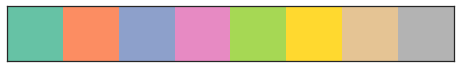

In [20]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

In [21]:
child=pd.read_csv("어린이인구.csv",encoding="cp949")

In [22]:
child=child[["행정동","어린이수"]]
child

,행정동,어린이수
0,가락1동,2054
1,가락2동,1819
2,가락본동,1045
3,가리봉동,167
4,가산동,423
...,...,...
419,효창동,498
420,후암동,653
421,휘경1동,518
422,휘경2동,879


## 어린이수-시설수

In [23]:
child_build=pd.read_csv("어린이시설수_최종.csv",encoding="cp949")

In [24]:
child_total=pd.merge(child,child_build,on="행정동")
child_total

,행정동,어린이수,시설수
0,가락1동,2054,14
1,가락2동,1819,21
2,가락본동,1045,18
3,가리봉동,167,4
4,가산동,423,12
...,...,...,...
419,효창동,498,10
420,후암동,653,10
421,휘경1동,518,7
422,휘경2동,879,15


In [26]:
# 어린이시설수 = 0인 행정동 제거
child_total = child_total.drop(index = child_total[child_total['시설수']==0].index)
child_total = child_total.reset_index(drop=True)
child_total

,행정동,어린이수,시설수
0,가락1동,2054,14
1,가락2동,1819,21
2,가락본동,1045,18
3,가리봉동,167,4
4,가산동,423,12
...,...,...,...
415,효창동,498,10
416,후암동,653,10
417,휘경1동,518,7
418,휘경2동,879,15


In [27]:
# scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
child_total_scale=pd.DataFrame(scaler.fit_transform(child_total[['어린이수','시설수']]),columns=child_total[['어린이수','시설수']].columns)
child_total_scale.insert(0, '행정동', child_total['행정동'])
child_total_scale

,행정동,어린이수,시설수
0,가락1동,1.757887,0.250
1,가락2동,1.413059,1.125
2,가락본동,0.277329,0.750
3,가리봉동,-1.011005,-1.000
4,가산동,-0.635363,0.000
...,...,...,...
415,효창동,-0.525312,-0.250
416,후암동,-0.297872,-0.250
417,휘경1동,-0.495965,-0.625
418,휘경2동,0.033749,0.375


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


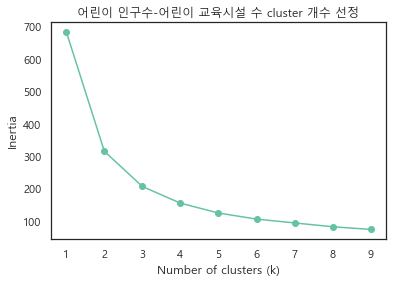

In [28]:
data = child_total_scale.values
X=data[:,1:] # 행정동명 제외
num_clusters = list(range(1,10))
inertias = []

# elbow
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('어린이 인구수-어린이 교육시설 수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 3

Text(0.5, 1.0, '어린이 인구수와 어린이 교육시설 수 clustering')

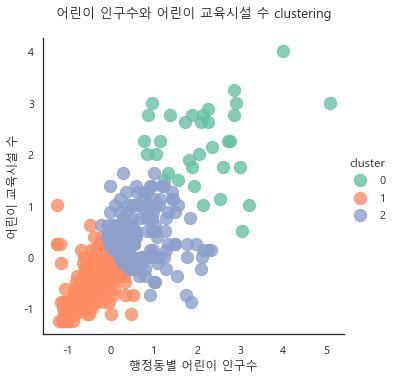

In [30]:
# clustering
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.cluster_centers_
kmeans.labels_
child_total_scale['cluster'] = kmeans.labels_

sns.lmplot(x = '어린이수',y = '시설수', data = child_total_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('행정동별 어린이 인구수')
plt.ylabel('어린이 교육시설 수')
plt.title('어린이 인구수와 어린이 교육시설 수 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster 0번(우상단) 선정

In [31]:
result = child_total_scale[child_total_scale['cluster']==0]
result

,행정동,어린이수,시설수,cluster
11,강일동,2.129127,2.750,0
25,공릉2동,2.245048,2.875,0
26,공항동,1.917828,1.375,0
27,광장동,2.535583,1.125,0
44,길음1동,2.990462,1.750,0
81,독산1동,1.803375,1.875,0
113,목5동,3.207630,1.000,0
117,문래동,2.044021,2.000,0
126,발산1동,2.356566,2.125,0
137,방화1동,2.729274,2.250,0


In [32]:
result.to_csv("어린이인구수_어린이교육시설수_clustering.csv",encoding="cp949")